In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import joblib

In [2]:
data = pd.read_csv("D:\data science\diabetes_prediction_dataset.csv")

In [3]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
data.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
49914,Female,40.0,0,0,never,27.32,6.5,160,0
23068,Male,8.0,0,0,No Info,16.54,6.1,126,0
38524,Female,66.0,0,0,current,21.40,6.6,155,0
19685,Female,24.0,0,0,never,27.32,5.0,155,0
86205,Male,57.0,0,0,never,27.32,3.5,80,0


In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
data['gender']= data['gender'].map({'Female':0, 'Male':1, 'Other':2})

In [8]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
data['smoking_history']= data['smoking_history'].map({'never':0, 'No Info':1, 'current':2, 'former':3, 'ever':4, 'not current':5})

In [10]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
x=data.drop('diabetes', axis='columns')

In [12]:
x.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,1,27.32,6.6,80
2,1,28.0,0,0,0,27.32,5.7,158
3,0,36.0,0,0,2,23.45,5.0,155
4,1,76.0,1,1,2,20.14,4.8,155


In [13]:
y=data['diabetes']

In [14]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [15]:
# splitting test set and training set

from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
len('x_train')

7

In [18]:
x_train.count()

gender                 80000
age                    80000
hypertension           80000
heart_disease          80000
smoking_history        80000
bmi                    80000
HbA1c_level            80000
blood_glucose_level    80000
dtype: int64

In [19]:
data.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [20]:
x_test.count()

gender                 20000
age                    20000
hypertension           20000
heart_disease          20000
smoking_history        20000
bmi                    20000
HbA1c_level            20000
blood_glucose_level    20000
dtype: int64

In [21]:
data.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [22]:
y_test.count()

20000

In [23]:
y_train.count()

80000

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR     #supervised learning algorith aka support vector machine
from sklearn.ensemble import RandomForestRegressor     
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
lr= LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
rf = RandomForestRegressor()

In [28]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
RandomForestRegressor()

RandomForestRegressor()

In [31]:
svm=SVR()

In [32]:
svm.fit(x_train,y_train)

SVR()

In [33]:
gr= svm.fit(x_train, y_train)

In [34]:
gr.fit(x_train, y_train)

SVR()

In [35]:
#predicting data sets
y_pred1= lr.predict(x_test)

In [36]:
y_pred2=svm.predict(x_test)

In [37]:
y_pred3= rf.predict(x_test)

In [38]:
x_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13.0,0,0,1,20.82,5.8,126
80184,0,3.0,0,0,1,21.00,5.0,145
19864,1,63.0,0,0,3,25.32,3.5,200
76699,0,2.0,0,0,0,17.43,6.1,126
92991,0,33.0,0,0,5,40.08,6.2,200


In [39]:
y_pred4= gr.predict(x_test)

In [40]:
df1= pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

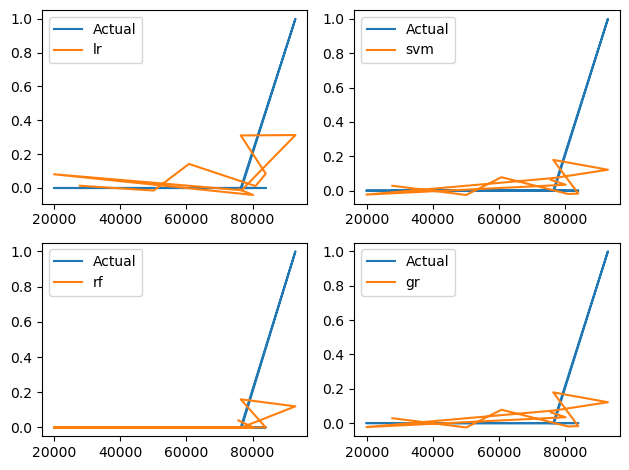

In [41]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [42]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.34404965858680037 0.4383781752989687 0.6728146380885611 0.4383781752989687


In [43]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [45]:
data={'gender':0, 'age':13.0, 'hypertension':0, 'heart_disease':0, 'smoking_history':1,
       'bmi':20.82, 'HbA1c_level':5.8, 'blood_glucose_level':126 }

In [46]:
df= pd.DataFrame(data,index=[0])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,13.0,0,0,1,20.82,5.8,126


In [47]:
new_pred = rf.predict(df)

In [48]:
print("diabetes:",new_pred[0])

diabetes: 0.04
